# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import time
from ddpg_agent import Agent
from collections import deque
import torch
import matplotlib.pyplot as plt
#from ddpg_agent import InitSharedMemory
import os, sys

seed= 8
print("Seed = {}".format(seed))
Agent1 = Agent(state_size, action_size, seed) 
Agent2 = Agent(state_size, action_size, seed) 

def train(n_episodes=500, max_t=2000, print_every=25): #max timesteps of 1000 was reached once
        scores_deque = deque(maxlen=print_every)
        #InitSharedMemory(action_size, seed)
        scores_A1 = [] #list of mean scores for each episode
        scores_A2 = [] #list of mean scores for each episode
        scores_both=[]
        scores_max = []        
        scores_min = []    
        duration_means=[]    

        for i_episode in range(1, n_episodes+1):
            # each episode --> train agents in parallel
            start_time=time.time()
            env_info = env.reset(train_mode=True)[brain_name]
            states = env_info.vector_observations
            scores = np.zeros(num_agents)
    
            Agent1.reset_noise()   
            Agent2.reset_noise()   
            timestep=0

            #for t in range(max_t) (maximum number of timesteps in an episode) --> not used
            while timestep < max_t:

                A1_actions = Agent1.act(states[0], add_noise=True)         
                A2_actions = Agent2.act(states[1], add_noise=True)    
                actions=[A1_actions, A2_actions]
                # execute actions parallel
                #actions = np.clip(actions, -1, 1,dtype=float) # check
                env_info = env.step(actions)[brain_name]           # send all actions to the environment
                next_states = env_info.vector_observations         # get next state (for each agent)
                rewards = env_info.rewards                         # get reward (for each agent)
                scores += env_info.rewards                         # update the score (for each agent)
                dones = env_info.local_done                        # see if episode finished
                #if True in ( obs !='' for obs in env_info.text_observations):
                if (any(ob !='' for ob in env_info.text_observations )):
                    print(env_info.text_observations)
                
                #shared_rewards=rewards[0]+rewards[1] # not that successful IME
                shared_rewards=max(rewards[0],rewards[1])
                # do save experience and take some time to learn
                for t in range(num_agents):
                    Agent1.step(states[t], actions[t], shared_rewards, next_states[t], dones[t], timestep)
                    Agent2.step(states[t], actions[t], shared_rewards, next_states[t], dones[t], timestep)
                # end of explicit learning functions
                states = next_states                               # roll over states to next time step
                timestep+=1
                if np.any(dones):                                  # exit loop if episode finished
                    break 
                if (timestep==max_t): 
                    print(" Max timesteps {} reached".format(timestep))

            scores_max.append(np.max(scores))             # save highest score for a single agent         
            scores_min.append(np.min(scores))
            scores_deque.append(np.mean(scores))
            scores_A1.append(np.mean(scores[0]))
            scores_A2.append(np.mean(scores[1]))
            scores_both.append(max(np.mean(scores_A1), np.mean(scores_A2)) )
            duration = time.time() - start_time
            duration_means.append(duration)

            print('\rEpisode {}\tTime {:.2f}sec\tAverage Score: {:.4f}\tMax: {:.4f}\tMin: {:.3f}'.format(i_episode,duration, np.mean(scores), scores_max[i_episode-1], scores_min[i_episode-1]), end="") 
            #  scores_deque
            if i_episode % print_every == 0:
                torch.save(Agent1.actor_local.state_dict(), f'checkpoint_actor_{i_episode}.pth')
                torch.save(Agent2.actor_local.state_dict(), f'checkpoint_actor_{i_episode}.pth')
                torch.save(Agent1.critic_local.state_dict(), f'checkpoint_critic_{i_episode}.pth')
                torch.save(Agent2.critic_local.state_dict(), f'checkpoint_critic_{i_episode}.pth')
                #print('\rEpisode {}\tAverage Score: {:.2f}\tlast Episode Score: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(scores)))
                print('\rEpisode {}\tTime {:.2f}sec(m)\tAvg. Score both 100ep: {:.4f}\tMax: {:.4f}'.format(i_episode,np.mean(duration_means), np.mean(scores_both[-100:]), np.max(scores_max)))   
                         
            # Specifically, After each episode, we add up the rewards that each agent received, to get a score for each agent. This yields 2 (potentially different) scores. 
            # We then take the maximum of these 2 scores. This yields a single score for each episode.            
            # #The environment is considered solved, when the average (over 100 episodes) of those scores is at least +0.5.

            # if timestep>10000: #and ScoresOver30(scores_means):
            if i_episode>1000:
                scores_over_last_100_episodes= scores_both[-100:]               
                # print("\tMean over last 100 Episodes = {:.3f}".format(np.mean(scores_over_last_100_episodes)))
                # restart programm when
                # if (np.mean(scores_over_last_100_episodes) < 0.01):
                #     print("Restarted")
                #     os.execv(sys.argv[0], sys.argv)
            
                if( (np.array(scores_over_last_100_episodes) > 0.5).all() ):
                    torch.save(Agent1.actor_local.state_dict(), f'checkpoint_actor_solved.pth')
                    torch.save(Agent2.actor_local.state_dict(), f'checkpoint_actor_solved.pth')
                    torch.save(Agent1.critic_local.state_dict(), f'checkpoint_critic_solved.pth')
                    torch.save(Agent2.critic_local.state_dict(), f'checkpoint_critic_solved.pth')
                    return scores_both

        print('Score (max over agents) from episode {}: {}'.format(i_episode, np.max(scores)))
        return scores_both

scores = train(2000) # 2000 episodes should be enough

cuda:0
Seed = 8
Episode 25	Time 0.48sec(m)	Avg. Score both 100ep: -0.0006	Max: 0.10000
Episode 50	Time 0.95sec(m)	Avg. Score both 100ep: -0.0002	Max: 0.10000
Episode 75	Time 1.06sec(m)	Avg. Score both 100ep: 0.0003	Max: 0.100010
Episode 100	Time 1.09sec(m)	Avg. Score both 100ep: 0.0000	Max: 0.100010
Episode 125	Time 1.11sec(m)	Avg. Score both 100ep: -0.0003	Max: 0.10000
Episode 150	Time 1.14sec(m)	Avg. Score both 100ep: -0.0008	Max: 0.10000
Episode 175	Time 1.15sec(m)	Avg. Score both 100ep: -0.0017	Max: 0.10000
Episode 200	Time 1.16sec(m)	Avg. Score both 100ep: -0.0022	Max: 0.10000
Episode 225	Time 1.16sec(m)	Avg. Score both 100ep: -0.0024	Max: 0.10000
Episode 250	Time 1.18sec(m)	Avg. Score both 100ep: -0.0025	Max: 0.10000
Episode 275	Time 1.21sec(m)	Avg. Score both 100ep: -0.0024	Max: 0.10000
Episode 300	Time 1.22sec(m)	Avg. Score both 100ep: -0.0020	Max: 0.10000
Episode 325	Time 1.22sec(m)	Avg. Score both 100ep: -0.0015	Max: 0.10000
Episode 350	Time 1.27sec(m)	Avg. Score both 100ep: 

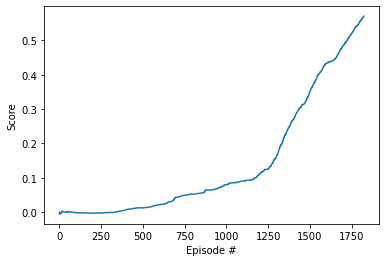

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

env.close()